In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]

In [4]:
import numpy as np

y = y.astype(np.uint8)

In [5]:
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [6]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [7]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)


In [25]:
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

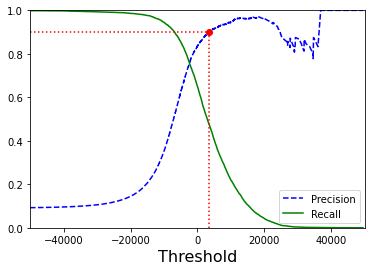

In [83]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold", fontsize=16)  # Not shown
plt.axis([-50000, 50000, 0, 1])
plt.legend()  # Not shown in the book

recall_at_90_precision = recalls[np.argmax(precisions >= 0.9)]
threshold_at_90_precision = thresholds[np.argmax(precisions >= 0.9)]

recall_at_90_precision
threshold_at_90_precision

plt.plot([threshold_at_90_precision, threshold_at_90_precision], [0, 0.9], "r:")
plt.plot([-50000, threshold_at_90_precision], [0.9, 0.9], "r:")
plt.plot([threshold_at_90_precision], [0.9], "ro")

plt.show()